In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 1.7 MB 56.6 MB/s 
     |████████████████████████████████| 439 kB 75.2 MB/s 
     |████████████████████████████████| 6.0 MB 63.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
!pip3 install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 24.1 MB/s 
     |████████████████████████████████| 182 kB 77.2 MB/s 
     |████████████████████████████████| 212 kB 75.0 MB/s 
     |████████████████████████████████| 132 kB 76.7 MB/s 
     |████████████████████████████████| 127 kB 73.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Mon Dec 12 18:05:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    24W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Enabling and testing the TPU

First, you'll need to enable TPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select TPU from the Hardware Accelerator drop-down

Next, we'll check that we can connect to the TPU:

In [ ]:
"""import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
"""

'import tensorflow as tf\nprint("Tensorflow version " + tf.__version__)\n\ntry:\n  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n  print(\'Running on TPU \', tpu.cluster_spec().as_dict()[\'worker\'])\nexcept ValueError:\n  raise BaseException(\'ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!\')\n\ntf.config.experimental_connect_to_cluster(tpu)\ntf.tpu.experimental.initialize_tpu_system(tpu)\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)\n'

In [ ]:
"""!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!gzip -d cc.en.300.vec.gz
"""

'!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz\n!gzip -d cc.en.300.vec.gz\n'

In [ ]:
"""
import pickle
import numpy as np

idx = 0
vocab = {}
# Save embeddings to numpy array (vocab_size x dimensions)
# We manually add 2 special tokens (for padding & unknown words)
with open("cc.en.300.vec", 'r', encoding="utf-8", newline='\n',errors='ignore') as f:
    for l in f:
        line = l.rstrip().split(' ')
        if idx == 0:
            vocab_size = int(line[0]) + 2
            dim = int(line[1])
            vecs = np.zeros(vocab_size*dim).reshape(vocab_size,dim)
            vocab["__PADDING__"] = 0
            vocab["__UNK__"] = 1
            idx = 2
        else:
            vocab[line[0]] = idx
            emb = np.array(line[1:]).astype(np.float)
            if (emb.shape[0] == dim):
                vecs[idx,:] = emb  # Embeddings are saved in an numpy array vecs
                idx+=1
            else:
                continue

    # Serialize vocab & embeddings
    pickle.dump(vocab,open("/content/gdrive/My Drive/fasttext_voc.pkl" ,'wb'))
    np.save("/content/gdrive/My Drive/fasttext.npy",vecs)
    
    # Free ram
    vecs = None
    vocab = None
    emb = None
    """

'\nimport pickle\nimport numpy as np\n\nidx = 0\nvocab = {}\n# Save embeddings to numpy array (vocab_size x dimensions)\n# We manually add 2 special tokens (for padding & unknown words)\nwith open("cc.en.300.vec", \'r\', encoding="utf-8", newline=\'\n\',errors=\'ignore\') as f:\n    for l in f:\n        line = l.rstrip().split(\' \')\n        if idx == 0:\n            vocab_size = int(line[0]) + 2\n            dim = int(line[1])\n            vecs = np.zeros(vocab_size*dim).reshape(vocab_size,dim)\n            vocab["__PADDING__"] = 0\n            vocab["__UNK__"] = 1\n            idx = 2\n        else:\n            vocab[line[0]] = idx\n            emb = np.array(line[1:]).astype(np.float)\n            if (emb.shape[0] == dim):\n                vecs[idx,:] = emb  # Embeddings are saved in an numpy array vecs\n                idx+=1\n            else:\n                continue\n\n    # Serialize vocab & embeddings\n    pickle.dump(vocab,open("/content/gdrive/My Drive/fasttext_voc.pkl" ,

In [ ]:
# --- Edits the results dataframe, and brings it into the desired format. ---

def edit_dataframe(df, area, set_):        
    # Edit precision field
    df['precision']['World'] = "{:.2f}%".format(df['precision']['World'] * 100)
    df['precision']['Sports'] = "{:.2f}%".format(df['precision']['Sports'] * 100)
    df['precision']['Business'] = "{:.2f}%".format(df['precision']['Business'] * 100)
    df['precision']['Sci/Tech'] = "{:.2f}%".format(df['precision']['Sci/Tech'] * 100)
    df['precision']['accuracy'] = "-"
    df['precision']['macro avg'] = "{:.2f}%".format(df['precision']['macro avg'] * 100)
    df['precision']['weighted avg'] = "{:.2f}%".format(df['precision']['weighted avg'] * 100)
    
    # Edit recall field
    df['recall']['World'] = "{:.2f}%".format(df['recall']['World'] * 100)
    df['recall']['Sports'] = "{:.2f}%".format(df['recall']['Sports'] * 100)
    df['recall']['Business'] = "{:.2f}%".format(df['recall']['Business'] * 100)
    df['recall']['Sci/Tech'] = "{:.2f}%".format(df['recall']['Sci/Tech'] * 100)
    df['recall']['accuracy'] = "-"
    df['recall']['macro avg'] = "{:.2f}%".format(df['recall']['macro avg'] * 100)
    df['recall']['weighted avg'] = "{:.2f}%".format(df['recall']['weighted avg'] * 100)
    
    # Edit f1-score field
    df['f1-score']['World'] = "{:.2f}%".format(df['f1-score']['World'] * 100)
    df['f1-score']['Sports'] = "{:.2f}%".format(df['f1-score']['Sports'] * 100)
    df['f1-score']['Business'] = "{:.2f}%".format(df['f1-score']['Business'] * 100)
    df['f1-score']['Sci/Tech'] = "{:.2f}%".format(df['f1-score']['Sci/Tech'] * 100)
    df['f1-score']['accuracy'] = "-"
    df['f1-score']['macro avg'] = "{:.2f}%".format(df['f1-score']['macro avg'] * 100)
    df['f1-score']['weighted avg'] = "{:.2f}%".format(df['f1-score']['weighted avg'] * 100)


    df.insert(3, "P-R-AUC", ["{:.2f}%".format(area['micro-World'] * 100), "{:.2f}%".format(area['micro-Sports'] * 100), "{:.2f}%".format(area['micro-Business'] * 100), "{:.2f}%".format(area['micro-Sci/Tech'] * 100), "-", "-", "-"], True)
    
    # Edit support field
    df['support'] = df['support'].astype(int)
    
    # Rename the columns
    df = df.rename(columns={'support': 'Number of instances'})
    df = df.rename(columns={'precision': 'Precision'})
    df = df.rename(columns={'recall': 'Recall'})
    df = df.rename(columns={'f1-score': 'F1-score'})
    
    # Rename the indexes (rows)
    df = df.rename(index={'accuracy': 'Accuracy'})
    df = df.rename(index={'macro avg': 'Macro averaged'})
    df = df.rename(index={'weighted avg': 'Weighted averaged'})
    
    # Finally, add a fancy title to our dataframe
    df = df.style.set_caption("Results occured across " + set_ + " data")

    # Return the new dataframe
    return df

Load the embeddings and the mapping dictionary from my Google Drive

In [ ]:
import pickle
import numpy as np

fasttext_embed = np.load("/content/gdrive/My Drive/fasttext.npy")
fasttext_word_to_index = pickle.load(open("/content/gdrive/My Drive/fasttext_voc.pkl", 'rb'))

In [ ]:
from datasets import load_dataset

# Load the dataset from the hugging face. For more information, please visit: https://huggingface.co/datasets/ag_news
dataset = load_dataset("ag_news")

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

# ***Split the dataset into train, dev, test subsets.***

In [ ]:
# Instance numbers
NUMBER_OF_TRAIN_INSTANCES_TO_KEEP = 12000
NUMBER_OF_DEV_INSTANCES_TO_KEEP = 4000
NUMBER_OF_TEST_INSTANCES_TO_KEEP = 2500

In [ ]:
# Number of best TF-IDF features to keep
NUMBER_OF_FEATURES_TO_KEEP = 500

In [ ]:
# --- First, move the texts into lists ---

train_x = []
train_y = []

dev_x = []
dev_y = []

test_x = []
test_y = []

for x in range(0, NUMBER_OF_TRAIN_INSTANCES_TO_KEEP):
    train_x.append(dataset['train'][x]['text'])
    train_y.append(dataset['train'][x]['label'])
    
for x in range(NUMBER_OF_TRAIN_INSTANCES_TO_KEEP, NUMBER_OF_TRAIN_INSTANCES_TO_KEEP + NUMBER_OF_DEV_INSTANCES_TO_KEEP):
    dev_x.append(dataset['train'][x]['text'])
    dev_y.append(dataset['train'][x]['label'])
    
for x in range(0, dataset['test'].num_rows):
    test_x.append(dataset['test'][x]['text'])
    test_y.append(dataset['test'][x]['label'])

In [ ]:
import random
# Let's showcase some random movie_reviews from the three subsets
rand1 = random.randrange(len(train_x))
rand2 = random.randrange(len(dev_x))	
rand3 = random.randrange(len(test_x))	

print("Random train tweet:\n{}".format(train_x[rand1]))
print("Random train tweet label:\n{}".format(train_y[rand1]))
print("-------------------------------------------------------")
print("Random dev tweet:\n{}".format(dev_x[rand2]))
print("Random dev tweet label:\n{}".format(dev_y[rand2]))
print("-------------------------------------------------------")
print("Random test tweet:\n{}".format(test_x[rand3]))
print("Random test tweet label:\n{}".format(test_y[rand3]))

# And let's also take a look on the subsets' length
print("\nTrain data length: {}".format(len(train_x)))
print("Dev data length: {}".format(len(dev_x)))
print("Test data length: {}".format(len(test_x)))

Random train tweet:
India take seventh place in Olympic hockey (Reuters) Reuters - Former hockey force Pakistan finished the Olympics in fifth place on Friday while Egypt slumped out of the tournament 12th.
Random train tweet label:
0
-------------------------------------------------------
Random dev tweet:
Irans Saei adds Athens gold to Sydney bronze TEHRAN (MNA) - Sydney bronze medalist Hadi Saei from Iran won the coveted gold of -68kg taekwondo tournament of 2004 Athens Olympic Games Friday.
Random dev tweet label:
1
-------------------------------------------------------
Random test tweet:
PalmOne Announces Tungsten T5 PalmOne has introduced the new Tungsten T5 PDA. The new Tungsten T5 features 256MB of flash memory, which doesn #39;t lose data when the device loses its charge.
Random test tweet label:
3

Train data length: 12000
Dev data length: 4000
Test data length: 7600


Use spacy for sentence splitting & tokenization

In [ ]:

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm',disable=["tagger", "parser","ner"])
nlp.add_pipe('sentencizer') 

def tokenize_samples(samples):
  
  tokenized_samples = []
  for i in range(len(samples)):
    doc = nlp(samples[i])  # Tokenize the sample into sentences
    tokens = []
    for sent in doc.sents:
      for tok in sent:  # Iterate through the words of the sentence
        if '\n' in tok.text or "\t" in tok.text or "--" in tok.text or "*" in tok.text or tok.text.lower() in STOP_WORDS:
          continue
        if tok.text.strip():  
          tokens.append(tok.text.replace('"',"'").strip())
    tokenized_samples.append(tokens)

  return tokenized_samples

X_train_tokenized = tokenize_samples(train_x)
X_val_tokenized = tokenize_samples(dev_x)
X_test_tokenized = tokenize_samples(test_x)

/usr/local/lib/python3.8/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Get mean and std for length on trainning set
print('Average length of smples: {:.2f}'.format(np.mean([len(x) for x in X_train_tokenized])))
print('Std length of samples: {:.2f}'.format(np.std([len(x) for x in X_train_tokenized])))
print('#Samples with length > 70: {} \n'.format(np.sum([len(x) > 70 for x in X_train_tokenized])))

rand_sample = random.randrange(len(train_x))

print("\nOriginal review text:\n{}".format(train_x[rand_sample]))       # First print the original form of a random review
print("\nFiltered review text:\n{}".format(X_train_tokenized[rand_sample]))  # Then the filtered version after the text pre-processing loop
print("\nLabel:\n", train_y[rand_sample])

Average length of smples: 31.00
Std length of samples: 9.76
#Samples with length > 70: 49 


Original review text:
Lanka claims \$5m for  #39;cable damages #39; COLOMBO: Sri Lankan authorities tried to seize an Indian ship yesterday and sought \$5 million in damages, accusing it of breaking the undersea fibre optic cable that connects the tropical island #39;s main Internet links to the rest of the world.

Filtered review text:
['Lanka', 'claims', '\\$5', 'm', '#', '39;cable', 'damages', '#', '39', ';', 'COLOMBO', ':', 'Sri', 'Lankan', 'authorities', 'tried', 'seize', 'Indian', 'ship', 'yesterday', 'sought', '\\$5', 'million', 'damages', ',', 'accusing', 'breaking', 'undersea', 'fibre', 'optic', 'cable', 'connects', 'tropical', 'island', '#', '39;s', 'main', 'Internet', 'links', 'rest', 'world', '.']

Label:
 3


In [ ]:
from sklearn.preprocessing import label_binarize

y_train_1_hot = label_binarize(train_y, classes=np.arange(4))
y_val_1_hot = label_binarize(dev_y, classes=np.arange(4))
y_test_1_hot = label_binarize(test_y, classes=np.arange(4))

print('y_train_1_hot[0]: {}'.format(y_train_1_hot[0]))
print('y_val_1_hot[0]: {}'.format(y_val_1_hot[0]))
print('y_test_1_hot[0]: {}'.format(y_test_1_hot[0]))

y_train_1_hot[0]: [0 0 1 0]
y_val_1_hot[0]: [0 0 0 1]
y_test_1_hot[0]: [0 0 1 0]


**Extracting tf-idf vectors for our baselines**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# --- Second feature extraction --- 
# TF-IDF vector, containing the max_features = 8000 best unigrams/bigrams in terms of TF-ID values

# Use unigram & bi-gram TF-IDF features
tf_idf_vectorizer = TfidfVectorizer(
    ngram_range = (1, 2), 
    max_features = 5000,
    # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
    sublinear_tf = True, 
    stop_words = stopwords.words('english'))

# Fit Vectorizer on train data
# Transform on all data (train - test)
x_train_tfidf = tf_idf_vectorizer.fit_transform([" ".join(x) for x in X_train_tokenized])
x_val_tfidf = tf_idf_vectorizer.transform([" ".join(x) for x in X_val_tokenized])

#**Baselines**


Confusion Matrix for test data:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


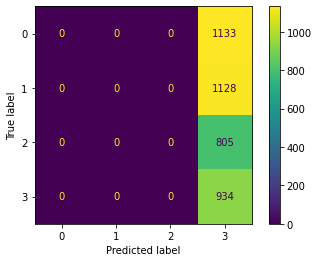

In [ ]:
from sklearn.dummy import DummyClassifier
import time
from sklearn.metrics import plot_confusion_matrix
# --------------------- (1) Baseline: Dummy Classifier ---------------------

# Train the dummy classifier who always predicts the 'most frequent' class
baseline = DummyClassifier(strategy='most_frequent')
dummy_start_time = time.time()
baseline.fit(x_train_tfidf, train_y)
dummy_end_time = time.time()


# Plot the confussion matrix for the test data
print("\nConfusion Matrix for test data:")
plot_confusion_matrix(estimator=baseline, X=x_val_tfidf, y_true = dev_y, values_format = '.0f')

Train micro f1-score: 92.79%
Train macro f1-score: 92.82% 

Val micro f1-score: 88.48%
Val macro f1-score: 87.90% 


Confusion Matrix for dev data:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
<ipython-input-9-71b51cf9e63b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recall']['World'] = "{:.2f}%".format(df['recall']['World'] * 100)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,Precision,Recall,F1-score,P-R-AUC,Number of instances
World,86.80%,87.64%,87.22%,93.06%,1133
Sports,94.16%,95.74%,94.95%,96.29%,1128
Business,86.46%,77.76%,81.88%,86.80%,805
Sci/Tech,85.28%,89.94%,87.55%,91.62%,934
Accuracy,-,-,-,-,0
Macro averaged,88.18%,87.77%,87.90%,-,4000
Weighted averaged,88.45%,88.48%,88.40%,-,4000


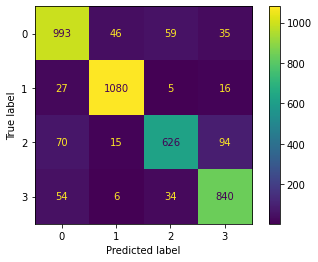

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, precision_recall_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
# --------------------- (2) Logistic Regression ---------------------

target_list = ["World", "Sports", "Business", "Sci/Tech"]

# Train
clf = LogisticRegression(solver="liblinear")
start_time_lr = time.time()
clf.fit(x_train_tfidf, train_y)
end_time_lr = time.time()

#Evaluate
predictions = clf.predict(x_train_tfidf)

micro_f1_score_train = f1_score(train_y, predictions, average='micro')
macro_f1_score_train = f1_score(train_y, predictions, average='macro')
print("Train micro f1-score: {:.2f}%".format(micro_f1_score_train*100))
print("Train macro f1-score: {:.2f}% \n".format(macro_f1_score_train*100))


predictions_dev = clf.predict(x_val_tfidf)
micro_f1_score_dev = f1_score(dev_y, predictions_dev, average='micro')
macro_f1_score_dev = f1_score(dev_y, predictions_dev, average='macro')
print("Val micro f1-score: {:.2f}%".format(micro_f1_score_dev*100))
print("Val macro f1-score: {:.2f}% \n".format(macro_f1_score_dev*100))

"""
predictions_test = clf.predict(x_test_tfidf)
micro_f1_score_test = f1_score(test_y, predictions_test, average='micro')
macro_f1_score_test = f1_score(test_y, predictions_test, average='macro')
print("Test micro f1-score: {:.2f}%".format(micro_f1_score_test*100))
print("Test macro f1-score: {:.2f}% \n".format(macro_f1_score_test*100))"""

# Plot the confussion matrix for the dev data
print("\nConfusion Matrix for dev data:")
plot_confusion_matrix(estimator=clf, X=x_val_tfidf, y_true=dev_y, values_format = '.0f')
report_lr_dev = classification_report(dev_y, predictions_dev, target_names=target_list, output_dict=True)

pred = clf.predict_proba(x_val_tfidf)
# For each class
precision = dict()
recall = dict()
average_precision = dict()
area = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_val_1_hot[:, i], pred[:, i])
    average_precision[i] = average_precision_score(y_val_1_hot[:, i], pred[:, i])
    # A "micro-average": quantifying score on each class
    category = "micro-" + target_list[i]
    precision[category], recall[category], _ = precision_recall_curve(
    y_val_1_hot[:, i], pred[:, i])
    area[category] = auc(recall[category], precision[category])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_val_1_hot.ravel(), pred.ravel()
)
area_all = auc(recall['micro'], precision['micro'])
# Display the results: Train
edit_dataframe(pd.DataFrame(report_lr_dev).transpose(), area, 'dev')

Custom Keras callback for calculating f1, precision, recall at the end of each epoch

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)
        val_targ = tf.cast(val_targ,dtype=tf.float32)
        

        _val_f1 = f1_score(val_targ, val_predict,average="weighted")
        _val_recall = recall_score(val_targ, val_predict,average="weighted")
        _val_precision = precision_score(val_targ, val_predict,average="weighted")

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

Tokenize, convert text (sequence of words) to sequence of indexes and PAD the sequences

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 60
EMBEDDING_DIM = fasttext_embed.shape[1]

# Init tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='__UNK__')
# num_words: the maximum number of words to keep, based on word frequency.
# oov_token: will be used to replace OOV WORDS

# Fit tokenizer (Updates internal vocabulary based on a list of texts.)
tokenizer.fit_on_texts([" ".join(x) for x in X_train_tokenized])

# Converts text to sequences of IDs
train_seqs = tokenizer.texts_to_sequences([" ".join(x) for x in X_train_tokenized])
val_seqs = tokenizer.texts_to_sequences([" ".join(x) for x in X_val_tokenized])
test_seqs = tokenizer.texts_to_sequences([" ".join(x) for x in X_test_tokenized])

train_data = pad_sequences(train_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
val_data = pad_sequences(val_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_data = pad_sequences(test_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
"""import tensorflow_hub as hub
import tensorflow.compat.v1 as tf

# Load pre trained ELMo model
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

train_elmo_embeddings = elmo(
    [train_seqs],
    signature="default",
    as_dict=True)["elmo"]

val_elmo_embeddings = elmo(
    [val_seqs],
    signature="default",
    as_dict=True)["elmo"]


test_elmo_embeddings = elmo(
    [test_seqs],
    signature="default",
    as_dict=True)["elmo"] """

'import tensorflow_hub as hub\nimport tensorflow.compat.v1 as tf\n\n# Load pre trained ELMo model\nelmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)\n\ntrain_elmo_embeddings = elmo(\n    [train_seqs],\n    signature="default",\n    as_dict=True)["elmo"]\n\nval_elmo_embeddings = elmo(\n    [val_seqs],\n    signature="default",\n    as_dict=True)["elmo"]\n\n\ntest_elmo_embeddings = elmo(\n    [test_seqs],\n    signature="default",\n    as_dict=True)["elmo"] '

In [ ]:
word_index = tokenizer.word_index
print('Found {} unique tokens.\n'.format(len(word_index)))

print(word_index)

Found 23893 unique tokens.

{'__UNK__': 1, 's': 2, '39': 3, 'reuters': 4, 'new': 5, 'said': 6, 'ap': 7, "'": 8, 'u': 9, 'gt': 10, 'lt': 11, 'oil': 12, 'athens': 13, 'thursday': 14, 'olympic': 15, 'tuesday': 16, 'year': 17, 'quot': 18, 'wednesday': 19, 'inc': 20, 'gold': 21, 'company': 22, 'monday': 23, 'world': 24, 'prices': 25, '1': 26, 'iraq': 27, 'york': 28, 'a': 29, 'stocks': 30, 'google': 31, '2': 32, 'week': 33, 'million': 34, '3': 35, 'com': 36, 'najaf': 37, 'yesterday': 38, 'second': 39, 'n': 40, 'friday': 41, 'united': 42, 'time': 43, 'government': 44, 'afp': 45, 'medal': 46, 'team': 47, 'says': 48, 'day': 49, 'percent': 50, 'people': 51, 'corp': 52, 'microsoft': 53, 'olympics': 54, 'president': 55, 'internet': 56, 'record': 57, 'night': 58, 'group': 59, 'games': 60, 'software': 61, 'sales': 62, 'market': 63, 'win': 64, 'china': 65, 'american': 66, 'sunday': 67, 'high': 68, 'al': 69, 'aug': 70, 'today': 71, 'security': 72, 'b': 73, 'years': 74, '4': 75, 'court': 76, 'profit': 

In [ ]:
# Previously, we saved all fasttext embeddings to a NumPy array for quick access
# Now, we save the fasttext embeddings for the words that we only need, based on the tokenizer

embedding_matrix = np.zeros((MAX_WORDS+2, EMBEDDING_DIM))  # +2 (pad, unkown)

for word, i in word_index.items():
    if i > MAX_WORDS:
            continue
    try:
        embedding_vector = fasttext_embed[fasttext_word_to_index[word],:]
        embedding_matrix[i] = embedding_vector
    except:
        pass

print(embedding_matrix)

[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [-0.0207 -0.2381 -0.3434 ... -0.2142  0.1497  0.1369]
 ...
 [ 0.0892  0.0332 -0.0179 ...  0.0742  0.0238 -0.1663]
 [ 0.0114 -0.0006  0.0089 ... -0.0431 -0.0491 -0.0707]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]


In [ ]:
#Return the indices of the elements that are non-zero.
np.nonzero(embedding_matrix)

(array([    2,     2,     2, ..., 10000, 10000, 10000]),
 array([  0,   1,   2, ..., 297, 298, 299]))

Create and train a BiLSTM + MLP model

In [ ]:
!pip3 install keras-self-attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18913 sha256=3ba110e8d9363b57b070802179276556b908614e97b314b1a56c0f2585642d2a
  Stored in directory: /root/.cache/pip/wheels/ac/13/2d/3de7c76f618a8d162884ac5b726a8c2242ad88afa370f1e62f
Successfully built keras-self-attention


In [ ]:
import keras
from keras_self_attention import SeqSelfAttention

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import initializers, regularizers, constraints
from tensorflow.keras.layers import Layer
import numpy as np

def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
      return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
      return K.dot(x, kernel)

class DeepAttention(Layer):
    def __init__(self,
                 kernel_regularizer=None, u_regularizer=None, bias_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True,
                 return_attention=False,
                 **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(kernel_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b1_regularizer = regularizers.get(bias_regularizer)
        self.b2_regularizer = regularizers.get(bias_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b1_constraint = constraints.get(b_constraint)
        self.b2_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.return_attention = return_attention
        super(DeepAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b1 = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b1'.format(self.name),
                                     regularizer=self.b1_regularizer,
                                     constraint=self.b1_constraint)
            self.b2 = self.add_weight(shape=(1,),
                                     initializer='zero',
                                     name='{}_b2'.format(self.name),
                                     regularizer=self.b2_regularizer,
                                     constraint=self.b2_constraint)
        else:
            self.b1 = None
            self.b2 = None

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        self.built = True


    def compute_mask(self, inputs, mask=None):
        # do not pass the mask to the next layers
        if self.return_attention:
            return [None, None]
        return None

    def call(self, x, mask=None):
        # uit = tanh(Wx + b)
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b1

        uit = K.tanh(uit)

        # ait = softmax(Ueij)
        eij = dot_product(uit, self.u)
        if self.bias:
            eij += self.b2

        # Apply mask
        if mask is not None:
            eij *= K.cast(mask, K.floatx())

        a = K.expand_dims(K.softmax(eij, axis=-1))
        
        weighted_input = x * a
        result = K.sum(weighted_input, axis=1)

        if self.return_attention:
            return [result, a]
        return result

    def compute_output_shape(self, input_shape):
        if self.return_attention:
            return [(input_shape[0], input_shape[-1]),
                    (input_shape[0], input_shape[1])]
        else:
            return input_shape[0], input_shape[-1]

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Embedding, Input, LayerNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras import Model

from keras_self_attention import SeqSelfAttention

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_crossentropy', patience=3)

LSTM_SIZE = 50
DENSE = 256

target_list = ["World", "Sports", "Business", "Sci/Tech"]

with tf.device('/device:GPU:0'):

  norm_layer = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_2 = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_3 = tf.keras.layers.LayerNormalization(axis=1)

  #norm_layer_alt = tf.keras.layers.LayerNormalization(axis=0)
  inputs = Input((MAX_SEQUENCE_LENGTH,))
  
  # Define the Embedding Layer with fastext weights
  embeddings = Embedding(input_dim=MAX_WORDS+2, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], 
                         input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False)(inputs)
  #norm_layer1 = LayerNormalization(axis=1, embeddings)
  norm_layer1 = norm_layer(embeddings)
  drop_emb = Dropout(0.33)(norm_layer1)
  
  # LSTM Layer 1 - Define a (Biderectional) RNN with LSTM cells
  bilstm1 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True, recurrent_dropout=0.33))(drop_emb)
  norm_layer2 = norm_layer_2(bilstm1)
  drop_encodings1 = Dropout(0.33)(norm_layer2)

  # LSTM Layer 2 - Define a (Biderectional) RNN with LSTM cells
  bilstm2 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True, recurrent_dropout=0.33))(drop_encodings1)
  norm_layer3 = norm_layer_3(bilstm2)
  drop_encodings2 = Dropout(0.33)(norm_layer3)
  


  # LSTM Layer 3 - Define a (Biderectional) RNN with LSTM cells
  #bilstm3 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True, recurrent_dropout=0.33))(drop_encodings2)
  #drop_encodings3 = Dropout(0.33)(bilstm3)

  # Pass the encoding through an Attension Layer
  x, attn = DeepAttention(return_attention=True)(drop_encodings2)
  # x, attn = LinearAttention(return_attention=True)(drop_encodings)
  #norm_layer3 = norm_layer_alt(x)
    
  # Alternatively use keras package for self-attention 
  #x, attn = SeqSelfAttention(return_attention=True)(drop_encodings)

  # Apply Droupout to the encoding produced by the attension mechanism
  drop_x = Dropout(0.33)(x)

  # Pass thruogh a Dense Layer
  hidden = Dense(units=DENSE, activation="relu")(drop_x)

  #norm_layer4 = norm_layer_alt(hidden)

  # Apply Dropout to the output of the Dense Layer
  drop_out = Dropout(0.33)(hidden)

  # Last pass through a Dense Layer with softmax activation to produce a probability distribution
  out = Dense(units=len(target_list), activation="softmax")(drop_out)
  
  # Wrap model --> Remember Functional API
  model2 = Model(inputs=inputs, outputs=out)
  print(model2.summary())

  model2.compile(loss='categorical_crossentropy',
                 optimizer=Adam(lr=0.001),
                 metrics=["accuracy"])

  if not os.path.exists('/content/gdrive/My Drive/checkpoints'):
    os.makedirs('/content/gdrive/My Drive/checkpoints')

  checkpoint = ModelCheckpoint('/content/gdrive/My Drive/checkpoints/BiLSTM_attn.hdf5',
                               monitor='val_accuracy', 
                               mode='max', verbose=2,
                               save_best_only=True,
                               save_weights_only=True)

  history2 = model2.fit(train_data, y_train_1_hot,
                        validation_data=(val_data, y_val_1_hot),
                        batch_size=64,
                        epochs=13,
                        shuffle=True,
                        callbacks=[Metrics(valid_data=(val_data, y_val_1_hot)),
                        checkpoint])

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 300)           3000600   
                                                                 
 layer_normalization (LayerN  (None, 60, 300)          120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 60, 300)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          140400    
 l)                                                              
                                                                 
 layer_normalization_1 (Laye  (None, 60, 100)          120   

None
Epoch 1/13
125/125 [==============================] - 11s 84ms/step
 — val_f1: 0.698587 — val_precision: 0.703981 — val_recall: 0.710250

Epoch 1: val_accuracy improved from -inf to 0.71025, saving model to /content/gdrive/My Drive/checkpoints/BiLSTM_attn.hdf5
188/188 [==============================] - 218s 1s/step - loss: 1.2729 - accuracy: 0.3795 - val_loss: 0.7747 - val_accuracy: 0.7103 - val_f1: 0.6986 - val_recall: 0.7103 - val_precision: 0.7040
Epoch 2/13
125/125 [==============================] - 10s 82ms/step
 — val_f1: 0.836343 — val_precision: 0.837412 — val_recall: 0.838250

Epoch 2: val_accuracy improved from 0.71025 to 0.83825, saving model to /content/gdrive/My Drive/checkpoints/BiLSTM_attn.hdf5
188/188 [==============================] - 201s 1s/step - loss: 0.7293 - accuracy: 0.7230 - val_loss: 0.5076 - val_accuracy: 0.8382 - val_f1: 0.8363 - val_recall: 0.8383 - val_precision: 0.8374
Epoch 3/13
125/125 [==============================] - 10s 82ms/step
 — val_f1: 0.8

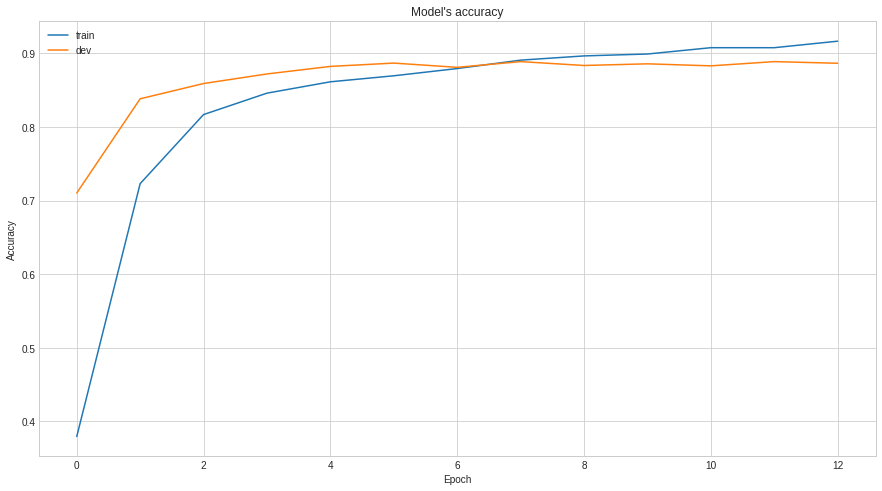

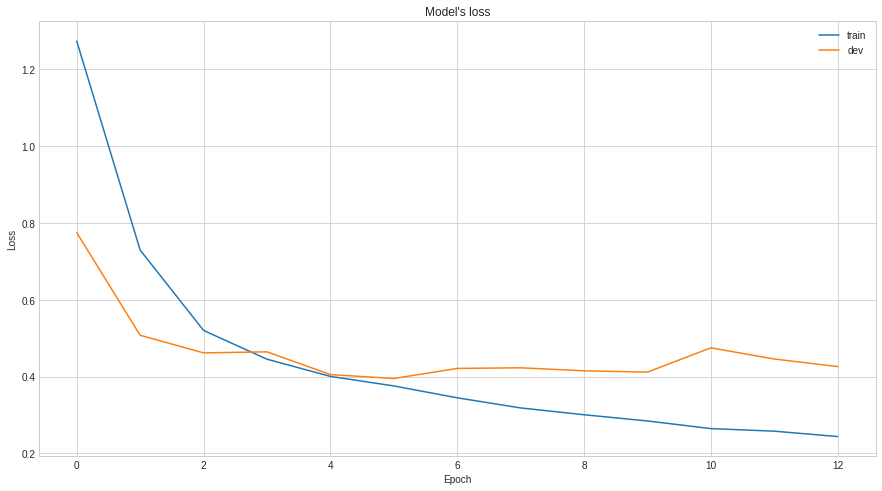

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.rcParams["figure.figsize"] = (15,8)
# plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('seaborn-whitegrid')

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model's accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show();

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model's loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show();

**Evaluate performance of BiLSTM + deep self-attention + MLP model on dev data**

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Embedding, Input
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras import Model
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, precision_recall_curve, auc, plot_confusion_matrix, average_precision_score, auc, roc_auc_score

LSTM_SIZE = 50
DENSE = 256

with tf.device('/device:GPU:0'):

  norm_layer = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_2 = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_3 = tf.keras.layers.LayerNormalization(axis=1)
  inputs = Input((MAX_SEQUENCE_LENGTH,))
  embeddings = Embedding(MAX_WORDS+2,EMBEDDING_DIM, weights=[embedding_matrix], 
                      input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False)(inputs)

  norm_layer1 = norm_layer(embeddings)
  bilstm = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = 0.33))(norm_layer1)
  norm_layer2 = norm_layer_2(bilstm)

  bilstm2 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True, recurrent_dropout=0.33))(norm_layer2)
  norm_layer3 = norm_layer_3(bilstm2)

  #bilstm2 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True, recurrent_dropout=0.33))(bilstm)
  #bilstm3 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True, recurrent_dropout=0.33))(bilstm2)
  x, attn = DeepAttention(return_attention=True)(norm_layer3)
  #norm_layer3 = LayerNormalization(x)
  hidden = Dense(units=DENSE, activation="relu")(x)
  #norm_layer4 = LayerNormalization(hidden)
  out = Dense(units=len(target_list), activation="softmax")(hidden)
  model2 = Model(inputs, out)
  print(model2.summary())
  
  # Load weights from the pre-trained model
  model2.load_weights("/content/gdrive/My Drive/checkpoints/BiLSTM_attn.hdf5")
  
  print("Dev set performance")
  predictions_val = np.argmax(model2.predict(val_data), -1)
  print(classification_report(dev_y, predictions_val, target_names=target_list))

  print()
  print("Training set performance") # Overfitting on training set
  predictions_train = np.argmax(model2.predict(train_data), -1)
  print(classification_report(train_y, predictions_train, target_names=target_list))

# calculating more metrics
  pred = model2.predict(val_data)
  # For each class
  precision = dict()
  recall = dict()
  average_precision = dict()
  area = dict()
  for i in range(4):
      precision[i], recall[i], _ = precision_recall_curve(y_val_1_hot[:, i], pred[:, i])
      average_precision[i] = average_precision_score(y_val_1_hot[:, i], pred[:, i])
      # A "micro-average": quantifying score on each class
      category = "micro-" + target_list[i]
      precision[category], recall[category], _ = precision_recall_curve(
      y_val_1_hot[:, i], pred[:, i])
      area[category] = auc(recall[category], precision[category])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(
      y_val_1_hot.ravel(), pred.ravel()
  )
  area_all = auc(recall['micro'], precision['micro'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 60, 300)           3000600   
                                                                 
 layer_normalization_3 (Laye  (None, 60, 300)          120       
 rNormalization)                                                 
                                                                 
 bidirectional_2 (Bidirectio  (None, 60, 100)          140400    
 nal)                                                            
                                                                 
 layer_normalization_4 (Laye  (None, 60, 100)          120       
 rNormalization)                                                 
                                                           

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


None
Dev set performance
125/125 [==============================] - 12s 82ms/step
              precision    recall  f1-score   support

       World       0.89      0.86      0.88      1133
      Sports       0.94      0.96      0.95      1128
    Business       0.84      0.81      0.83       805
    Sci/Tech       0.86      0.90      0.88       934

    accuracy                           0.89      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.89      0.89      0.89      4000


Training set performance
375/375 [==============================] - 31s 84ms/step
              precision    recall  f1-score   support

       World       0.96      0.89      0.92      2976
      Sports       0.94      1.00      0.97      2789
    Business       0.91      0.91      0.91      3039
    Sci/Tech       0.92      0.94      0.93      3196

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0

# ***Fine Tuning using Keras Tuner***

In [ ]:
"""if i==0:
      locals()["bilstm"+str(i)] = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(embeddings)
    elif i==1:
      locals()["bilstm"+str(i)] = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(locals()["bilstm"+str(i-1)])
    else:
      locals()["bilstm"+str(i)] = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(locals()["bilstm"+str(i-1)])"""

'if i==0:\n      locals()["bilstm"+str(i)] = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(embeddings)\n    elif i==1:\n      locals()["bilstm"+str(i)] = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(locals()["bilstm"+str(i-1)])\n    else:\n      locals()["bilstm"+str(i)] = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(locals()["bilstm"+str(i-1)])'

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  LSTM_SIZE = hp.Int('lstm_size', min_value = 40, max_value = 60, step = 10)
  MAX_WORDS = 10000
  MAX_SEQUENCE_LENGTH = 60
  EMBEDDING_DIM = fasttext_embed.shape[1]
  norm_layer = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_0 = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_1 = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_2 = tf.keras.layers.LayerNormalization(axis=1)
  norm_layer_3 = tf.keras.layers.LayerNormalization(axis=1)

  target_list = ["World", "Sports", "Business", "Sci/Tech"]

  inputs = Input((MAX_SEQUENCE_LENGTH,))
  embeddings = Embedding(MAX_WORDS+2,EMBEDDING_DIM, weights=[embedding_matrix], 
                      input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False)(inputs)
  norm_layer_emb = norm_layer(embeddings)


  activation_ = hp.Choice("activation", ["relu", "tanh", "sigmoid"])
  hp_recurrent_dropout = hp.Float('dropout_rate', min_value=0.2, max_value=0.6,step=0.1)
  units_ = hp.Int('hidden_layer_units', min_value = 256, max_value = 768, step = 256)

  for i in range(hp.Int('num_layers', 1, 3)):

    hp_dropout = hp.Float('dropout_rate', min_value=0.1, max_value=0.7,step=0.1)

    if i==0:
     bilstm0 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(norm_layer_emb)
     norm_layer0 = norm_layer_0(bilstm0)
     drop_encodings0 = Dropout(hp_dropout)(norm_layer0)
     last = drop_encodings0
    elif i==1:
      bilstm1 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(drop_encodings0)
      norm_layer1 = norm_layer_1(bilstm1)
      drop_encodings1 = Dropout(hp_dropout)(norm_layer1)
      last = drop_encodings1
    elif i==2:
      bilstm2 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(drop_encodings1)
      norm_layer2 = norm_layer_2(bilstm2)
      drop_encodings2 = Dropout(hp_dropout)(norm_layer2)
      last = drop_encodings2
    else:
      bilstm3 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(drop_encodings2)
      norm_layer3 = norm_layer_3(bilstm3)
      drop_encodings3 = Dropout(hp_dropout)(norm_layer3)
      last = drop_encodings3
    #else:
     # bilstm4 = Bidirectional(LSTM(units=LSTM_SIZE, return_sequences=True,recurrent_dropout = hp_recurrent_dropout))(drop_encodings3)
     # norm_layer4 = norm_layer(bilstm4)
     # drop_encodings4 = Dropout(hp_dropout)(norm_layer4)
     # last = drop_encodings4

  x_, attn = DeepAttention(return_attention=True)(last)
  drop_x = Dropout(hp_dropout)(x_)
  hidden = Dense(units=units_, activation=activation_)(drop_x)
  drop_out = Dropout(hp_dropout)(hidden)
  out = Dense(units=len(target_list), activation="softmax")(drop_out) # no fine tuning here, we need 4 neurons and softmax as the activation function

  model_ft = Model(inputs, outputs=out)
  print(model_ft.summary())
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  #hp_learning_rate = hp.Choice('learning_rate', values=[5e-3, 1e-3, 5e-4, 1e-4])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4, 5e-5, 1e-5])
  #hp_optimizer = hp.Choice('optimizer', ['Adam', 'sgd'])
  model_ft.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy', 'categorical_crossentropy'])

  return model_ft

In [ ]:
!pip3 install -q -U keras-tuner

     |████████████████████████████████| 135 kB 40.6 MB/s 
     |████████████████████████████████| 1.6 MB 52.0 MB/s 


In [ ]:
import keras_tuner as kt

with tf.device('/device:GPU:0'):
  tuner_= kt.RandomSearch(model_builder,
                      objective=kt.Objective("val_categorical_crossentropy", direction="min"),
                      max_trials=4,
                      directory="nlp4",
                      project_name="RNNfinetuning7")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 60, 300)           3000600   
                                                                 
 layer_normalization_11 (Lay  (None, 60, 300)          120       
 erNormalization)                                                
                                                                 
 bidirectional_4 (Bidirectio  (None, 60, 80)           109120    
 nal)                                                            
                                                                 
 layer_normalization_12 (Lay  (None, 60, 80)           120       
 erNormalization)                                                
                                                           

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_crossentropy', patience=3)

In [ ]:
tuner_.search(train_data, y_train_1_hot, epochs=10, batch_size=64, callbacks=[stop_early], validation_data=(val_data, y_val_1_hot))

Trial 4 Complete [00h 18m 33s]
val_categorical_crossentropy: 1.387786626815796

Best val_categorical_crossentropy So Far: 0.3697253465652466
Total elapsed time: 01h 40m 29s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of RNN layers is {best_hps.get('num_layers')}. The optimal number of units in the hidden dense
layer is {best_hps.get('hidden_layer_units')} , the optimal activation function is {best_hps.get('activation')}, the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}. The optimal dropout rate is {best_hps.get('dropout_rate')}.
""")


The hyperparameter search is complete. The optimal number of RNN layers is 1. The optimal number of units in the hidden dense
layer is 256 , the optimal activation function is sigmoid, the optimal learning rate for the optimizer
is 0.0005. The optimal dropout rate is 0.4000000000000001.



In [ ]:
fine_model = tuner_.hypermodel.build(best_hps)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 60, 300)           3000600   
                                                                 
 layer_normalization_5 (Laye  (None, 60, 300)          120       
 rNormalization)                                                 
                                                                 
 bidirectional_3 (Bidirectio  (None, 60, 120)          173280    
 nal)                                                            
                                                                 
 layer_normalization_6 (Laye  (None, 60, 120)          120       
 rNormalization)                                                 
                                                           

In [ ]:
print(fine_model.summary())

history = fine_model.fit(
    train_data, 
    y_train_1_hot,
    validation_data=(val_data, y_val_1_hot),
    batch_size=256,
    epochs=10,
    shuffle=True,
    callbacks=[Metrics(valid_data=(val_data, y_val_1_hot)), checkpoint]
    )

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 60, 300)           3000600   
                                                                 
 layer_normalization_5 (Laye  (None, 60, 300)          120       
 rNormalization)                                                 
                                                                 
 bidirectional_3 (Bidirectio  (None, 60, 120)          173280    
 nal)                                                            
                                                                 
 layer_normalization_6 (Laye  (None, 60, 120)          120       
 rNormalization)                                                 
                                                           

In [ ]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 9


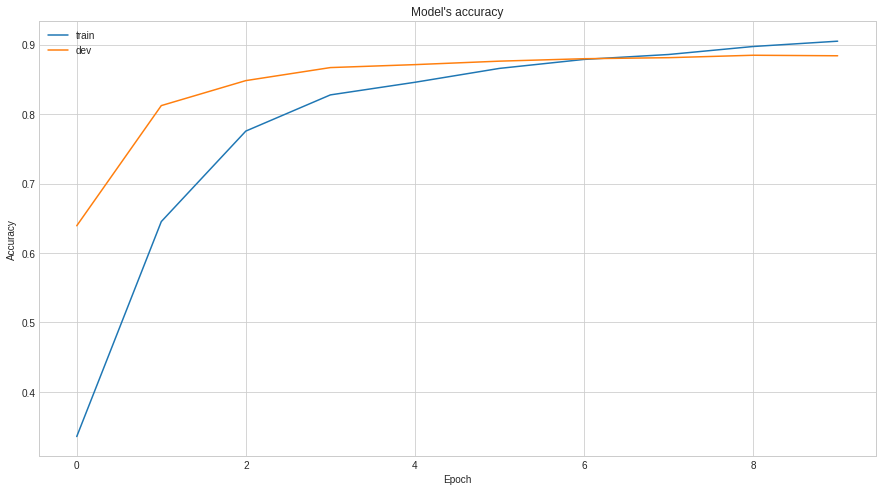

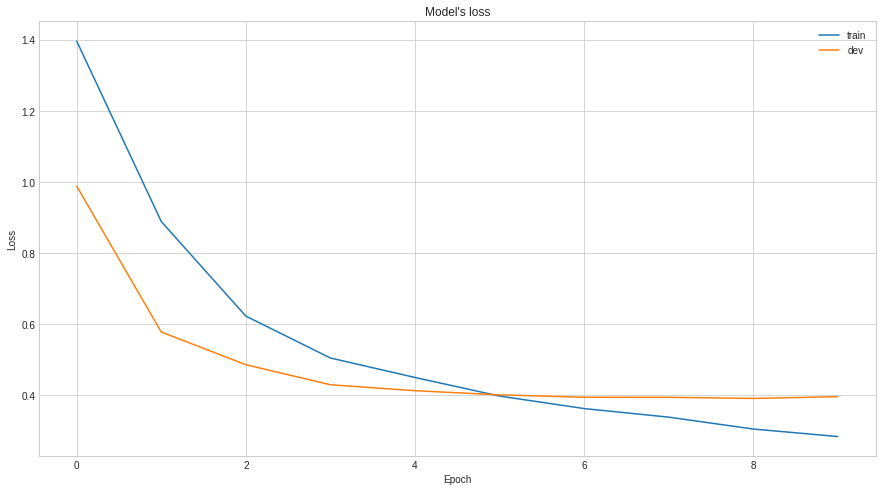

In [ ]:
# summarize history for accuracy
plt.rcParams["figure.figsize"] = (15,8)
# plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('seaborn-whitegrid')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show();

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show();

In [ ]:
predictions_val = fine_model.predict(val_data)

#report_lr_dev = classification_report(dev_y, predictions_val, target_names=target_list, output_dict=True)

125/125 [==============================] - 7s 58ms/step
